# Python base data analysis library

## 一、Numpy
- 基础数据结构
- 通用函数
- 索引切片
- 随机数
- 数据的输入输出

### A 多维数组的属性

In [1]:
# 多维数组ndarray

import numpy as np

ar = np.array([1,2,3,4,5,6,7])
print(ar)          # 输出数组，注意数组的格式：中括号，元素之间没有逗号（和列表区分）
print(ar.ndim)     # 输出数组维度的个数（轴数），或者说“秩”，维度的数量也称rank
print(ar.shape)    # 数组的维度，对于n行m列的数组，shape为（n，m）
print(ar.size)     # 数组的元素总数，对于n行m列的数组，元素总数为n*m
print(ar.dtype)    # 数组中元素的类型，类似type()（注意了，type()是函数，.dtype是方法）
print(ar.itemsize) # 数组中每个元素的字节大小，int32l类型字节为4，float64的字节为8
print(ar.data)     # 包含实际数组元素的缓冲区，由于一般通过数组的索引获取元素，所以通常不需要使用这个属性。
ar   # 交互方式下输出，会有array(数组)

# 数组的基本属性
# ① 数组的维数称为秩（rank），一维数组的秩为1，二维数组的秩为2，以此类推
# ② 在NumPy中，每一个线性的数组称为是一个轴（axes），秩其实是描述轴的数量：
# 比如说，二维数组相当于是两个一维数组，其中第一个一维数组中每个元素又是一个一维数组
# 所以一维数组就是NumPy中的轴（axes），第一个轴相当于是底层数组，第二个轴是底层数组里的数组。
# 而轴的数量——秩，就是数组的维数。 

[1 2 3 4 5 6 7]
1
(7,)
7
int32
4


array([1, 2, 3, 4, 5, 6, 7])

### B 创建数组

#### B1 array()

In [2]:
# 创建数组：array()函数，括号内可以是列表、元祖、数组、生成器等

ar1 = np.array(range(10))   # 整型
ar2 = np.array([1,2,3.14,4,5])   # 浮点型
ar3 = np.array([[1,2,3],('a','b','c')])   # 二维数组：嵌套序列（列表，元祖均可）
ar4 = np.array([[1,2,3],('a','b','c','d')])   # 注意嵌套序列数量不一会怎么样
print(ar1,type(ar1),ar1.dtype)
print(ar2,type(ar2),ar2.dtype)
print(ar3,ar3.shape,ar3.ndim,ar3.size)     # 二维数组，共6个元素
print(ar4,ar4.shape,ar4.ndim,ar4.size)     # 一维数组，共2个元素

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'> int32
[1.   2.   3.14 4.   5.  ] <class 'numpy.ndarray'> float64
[['1' '2' '3']
 ['a' 'b' 'c']] (2, 3) 2 6
[list([1, 2, 3]) ('a', 'b', 'c', 'd')] (2,) 1 2


#### B2 arange()

In [3]:
# 创建数组：arange()，类似range()，在给定间隔内返回均匀间隔的值。

print(np.arange(10))    # 返回0-9，整型
print(np.arange(10.0))  # 返回0.0-9.0，浮点型
print(np.arange(5,12))  # 返回5-11
print(np.arange(5.0,12,2))  # 返回5.0-12.0，步长为2
print(np.arange(10000))  # 如果数组太大而无法打印，NumPy会自动跳过数组的中心部分，并只打印边角：

[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 5  6  7  8  9 10 11]
[ 5.  7.  9. 11.]
[   0    1    2 ... 9997 9998 9999]


#### B3 lnspace()

In [4]:
# 创建数组：linspace():返回在间隔[开始，停止]上计算的num个均匀间隔的样本。

ar1 = np.linspace(2.0, 3.0, num=5)
ar2 = np.linspace(2.0, 3.0, num=5, endpoint=False)
ar3 = np.linspace(2.0, 3.0, num=5, retstep=True)
print(ar1,type(ar1))
print(ar2)
print(ar3,type(ar3))
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# start：起始值，stop：结束值
# num：生成样本数，默认为50
# endpoint：如果为真，则停止是最后一个样本。否则，不包括在内。默认值为True。
# retstep：如果为真，返回（样本，步骤），其中步长是样本之间的间距 → 输出为一个包含2个元素的元祖，第一个元素为array，第二个为步长实际值

[2.   2.25 2.5  2.75 3.  ] <class 'numpy.ndarray'>
[2.  2.2 2.4 2.6 2.8]
(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25) <class 'tuple'>


#### b4 zeros/zero_like/ones/ones_like

In [5]:
# 创建数组：zeros()/zeros_like()/ones()/ones_like()

ar1 = np.zeros(5)  
ar2 = np.zeros((2,2), dtype = np.int)
print(ar1,ar1.dtype)
print(ar2,ar2.dtype)
print('------')
# numpy.zeros(shape, dtype=float, order='C'):返回给定形状和类型的新数组，用零填充。
# shape：数组纬度，二维以上需要用()，且输入参数为整数
# dtype：数据类型，默认numpy.float64
# order：是否在存储器中以C或Fortran连续（按行或列方式）存储多维数据。

ar3 = np.array([list(range(5)),list(range(5,10))])
ar4 = np.zeros_like(ar3)
print(ar3)
print(ar4)
print('------')
# 返回具有与给定数组相同的形状和类型的零数组，这里ar4根据ar3的形状和dtype创建一个全0的数组

ar5 = np.ones(9)
ar6 = np.ones((2,3,4))
ar7 = np.ones_like(ar3)
print(ar5)
print(ar6)
print(ar7)
# ones()/ones_like()和zeros()/zeros_like()一样，只是填充为1

[0. 0. 0. 0. 0.] float64
[[0 0]
 [0 0]] int32
------
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 0 0 0 0]
 [0 0 0 0 0]]
------
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
[[1 1 1 1 1]
 [1 1 1 1 1]]


#### B5 单位矩阵

In [6]:
# 创建数组：eye()

print(np.eye(5))
# 创建一个正方的N*N的单位矩阵，对角线值为1，其余为0

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### C 通用函数

#### c1 数组维度转换

In [7]:
# 数组形状：.T/.reshape()/.resize()

ar1 = np.arange(10)
ar2 = np.ones((5,2))
print(ar1,'\n',ar1.T)
print(ar2,'\n',ar2.T)
print('------')
# .T方法：转置，例如原shape为(3,4)/(2,3,4)，转置结果为(4,3)/(4,3,2) → 所以一维数组转置后结果不变

ar3 = ar1.reshape(2,5)     # 用法1：直接将已有数组改变形状             
ar4 = np.zeros((4,6)).reshape(3,8)   # 用法2：生成数组后直接改变形状
ar5 = np.reshape(np.arange(12),(3,4))   # 用法3：参数内添加数组，目标形状
print(ar1,'\n',ar3)
print(ar4)
print(ar5)
print('------')
# numpy.reshape(a, newshape, order='C')：为数组提供新形状，而不更改其数据，所以元素数量需要一致！！

ar6 = np.resize(np.arange(5),(3,4))
print(ar6)
# numpy.resize(a, new_shape)：返回具有指定形状的新数组，如有必要可重复填充所需数量的元素。
# 注意了：.T/.reshape()/.resize()都是生成新的数组！！！

[0 1 2 3 4 5 6 7 8 9] 
 [0 1 2 3 4 5 6 7 8 9]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]] 
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
------
[0 1 2 3 4 5 6 7 8 9] 
 [[0 1 2 3 4]
 [5 6 7 8 9]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
------
[[0 1 2 3]
 [4 0 1 2]
 [3 4 0 1]]


#### C2 数组的复制

In [8]:
# 数组的复制

ar1 = np.arange(10)
ar2 = ar1
print(ar2 is ar1)
ar1[2] = 9
print(ar1,ar2)
# 回忆python的赋值逻辑：指向内存中生成的一个值 → 这里ar1和ar2指向同一个值，所以ar1改变，ar2一起改变

ar3 = ar1.copy()
print(ar3 is ar1)
ar1[0] = 9
print(ar1,ar3)
# copy方法生成数组及其数据的完整拷贝
# 再次提醒：.T/.reshape()/.resize()都是生成新的数组！！！

True
[0 1 9 3 4 5 6 7 8 9] [0 1 9 3 4 5 6 7 8 9]
False
[9 1 9 3 4 5 6 7 8 9] [0 1 9 3 4 5 6 7 8 9]


#### C3 数组类型转换

In [9]:
# 数组类型转换：.astype()

ar1 = np.arange(10,dtype=float)
print(ar1,ar1.dtype)
print('-----')
# 可以在参数位置设置数组类型

ar2 = ar1.astype(np.int32)
print(ar2,ar2.dtype)
print(ar1,ar1.dtype)
# a.astype()：转换数组类型
# 注意：养成好习惯，数组类型用np.int32，而不是直接int32

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] float64
-----
[0 1 2 3 4 5 6 7 8 9] int32
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] float64


#### C4 数组堆叠 stack

In [10]:
# 数组堆叠

a = np.arange(5)    # a为一维数组，5个元素
b = np.arange(5,9) # b为一维数组,4个元素
ar1 = np.hstack((a,b))  # 注意:((a,b))，这里形状可以不一样
print(a,a.shape)
print(b,b.shape)
print(ar1,ar1.shape)
a = np.array([[1],[2],[3]])   # a为二维数组，3行1列
b = np.array([['a'],['b'],['c']])  # b为二维数组，3行1列
ar2 = np.hstack((a,b))  # 注意:((a,b))，这里形状必须一样
print(a,a.shape)
print(b,b.shape)
print(ar2,ar2.shape)
print('-----')
# numpy.hstack(tup)：水平（按列顺序）堆叠数组

a = np.arange(5)    
b = np.arange(5,10)
ar1 = np.vstack((a,b))
print(a,a.shape)
print(b,b.shape)
print(ar1,ar1.shape)
a = np.array([[1],[2],[3]])   
b = np.array([['a'],['b'],['c'],['d']])   
ar2 = np.vstack((a,b))  # 这里形状可以不一样
print(a,a.shape)
print(b,b.shape)
print(ar2,ar2.shape)
print('-----')
# numpy.vstack(tup)：垂直（按列顺序）堆叠数组

a = np.arange(5)    
b = np.arange(5,10)
ar1 = np.stack((a,b))
ar2 = np.stack((a,b),axis = 1) # 沿x轴方向堆叠
print(a,a.shape)
print(b,b.shape)
print(ar1,ar1.shape)
print(ar2,ar2.shape)
# numpy.stack(arrays, axis=0)：沿着新轴连接数组的序列，形状必须一样！
# 重点解释axis参数的意思，假设两个数组[1 2 3]和[4 5 6]，shape均为(3,0)
# axis=0：[[1 2 3] [4 5 6]]，shape为(2,3)
# axis=1：[[1 4] [2 5] [3 6]]，shape为(3,2)

[0 1 2 3 4] (5,)
[5 6 7 8] (4,)
[0 1 2 3 4 5 6 7 8] (9,)
[[1]
 [2]
 [3]] (3, 1)
[['a']
 ['b']
 ['c']] (3, 1)
[['1' 'a']
 ['2' 'b']
 ['3' 'c']] (3, 2)
-----
[0 1 2 3 4] (5,)
[5 6 7 8 9] (5,)
[[0 1 2 3 4]
 [5 6 7 8 9]] (2, 5)
[[1]
 [2]
 [3]] (3, 1)
[['a']
 ['b']
 ['c']
 ['d']] (4, 1)
[['1']
 ['2']
 ['3']
 ['a']
 ['b']
 ['c']
 ['d']] (7, 1)
-----
[0 1 2 3 4] (5,)
[5 6 7 8 9] (5,)
[[0 1 2 3 4]
 [5 6 7 8 9]] (2, 5)
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]] (5, 2)


#### C5 数组拆分 hsplit\vsplit

In [11]:
ar = np.arange(16).reshape(4,4)
ar1 = np.hsplit(ar,2)
print(ar)
print(ar1,type(ar1))
# numpy.hsplit(ary, indices_or_sections)：将数组水平（逐列）拆分为多个子数组 → 按列拆分
# 输出结果为列表，列表中元素为数组

ar2 = np.vsplit(ar,4)
print(ar2,type(ar2))
# numpy.vsplit(ary, indices_or_sections)：:将数组垂直（行方向）拆分为多个子数组 → 按行拆

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])] <class 'list'>
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]]), array([[12, 13, 14, 15]])] <class 'list'>


#### C6 数组简单运算

In [12]:
# 数组简单运算

ar = np.arange(6).reshape(2,3)
print(ar + 10)   # 加法
print(ar * 2)   # 乘法
print(1 / (ar+1))  # 除法
print(ar ** 0.5)  # 幂
# 与标量的运算

print(ar.mean())  # 求平均值
print(ar.max())  # 求最大值
print(ar.min())  # 求最小值
print(ar.std())  # 求标准差
print(ar.var())  # 求方差
print(ar.sum(), np.sum(ar,axis = 0))  # 求和，np.sum() → axis为0，按列求和；axis为1，按行求和
print(np.sort(np.array([1,4,3,2,5,6])))  # 排序
# 常用函数

[[10 11 12]
 [13 14 15]]
[[ 0  2  4]
 [ 6  8 10]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[0.         1.         1.41421356]
 [1.73205081 2.         2.23606798]]
2.5
5
0
1.707825127659933
2.9166666666666665
15 [3 5 7]
[1 2 3 4 5 6]


#### C7 基本索引及切片

In [13]:
# 基本索引及切片

ar = np.arange(20)
print(ar)
print(ar[4])
print(ar[3:6])
print('-----')
# 一维数组索引及切片

ar = np.arange(16).reshape(4,4)
print(ar, '数组轴数为%i' %ar.ndim)   # 4*4的数组
print(ar[2],  '数组轴数为%i' %ar[2].ndim)  # 切片为下一维度的一个元素，所以是一维数组
print(ar[2][1]) # 二次索引，得到一维数组中的一个值
print(ar[1:3],  '数组轴数为%i' %ar[1:3].ndim)  # 切片为两个一维数组组成的二维数组
print(ar[2,2])  # 切片数组中的第三行第三列 → 10
print(ar[:2,1:])  # 切片数组中的1,2行、2,3,4列 → 二维数组
print('-----')
# 二维数组索引及切片

ar = np.arange(8).reshape(2,2,2)
print(ar, '数组轴数为%i' %ar.ndim)   # 2*2*2的数组
print(ar[0],  '数组轴数为%i' %ar[0].ndim)  # 三维数组的下一个维度的第一个元素 → 一个二维数组
print(ar[0][0],  '数组轴数为%i' %ar[0][0].ndim)  # 三维数组的下一个维度的第一个元素下的第一个元素 → 一个一维数组
print(ar[0][0][1],  '数组轴数为%i' %ar[0][0][1].ndim)  
# **三维数组索引及切片

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
4
[3 4 5]
-----
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 数组轴数为2
[ 8  9 10 11] 数组轴数为1
9
[[ 4  5  6  7]
 [ 8  9 10 11]] 数组轴数为2
10
[[1 2 3]
 [5 6 7]]
-----
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]] 数组轴数为3
[[0 1]
 [2 3]] 数组轴数为2
[0 1] 数组轴数为1
1 数组轴数为0


#### C8 布尔型索引及切片

In [14]:
# 布尔型索引及切片

ar = np.arange(12).reshape(3,4)
i = np.array([True,False,True])
j = np.array([True,True,False,False])
print(ar)
print(i)
print(j)
print(ar[i,:])  # 在第一维度做判断，只保留True，这里第一维度就是行，ar[i,:] = ar[i]（简单书写格式）
print(ar[:,j])  # 在第二维度做判断，这里如果ar[:,i]会有警告，因为i是3个元素，而ar在列上有4个
# 布尔型索引：以布尔型的矩阵去做筛选

m = ar > 5
print(m)  # 这里m是一个判断矩阵
print(ar[m])  # 用m判断矩阵去筛选ar数组中>5的元素 → 重点！后面的pandas判断方式原理就来自此处

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ True False  True]
[ True  True False False]
[[ 0  1  2  3]
 [ 8  9 10 11]]
[[0 1]
 [4 5]
 [8 9]]
[[False False False False]
 [False False  True  True]
 [ True  True  True  True]]
[ 6  7  8  9 10 11]


#### C9 数组索引及切片值的更改、复制

In [15]:
# 数组索引及切片的值更改、复制

ar = np.arange(10)
print(ar)
ar[5] = 100
ar[7:9] = 200
print(ar)
# 一个标量赋值给一个索引/切片时，会自动改变/传播原始数组

ar = np.arange(10)
b = ar.copy()
b[7:9] = 200
print(ar)
print(b)
# 复制

[0 1 2 3 4 5 6 7 8 9]
[  0   1   2   3   4 100   6 200 200   9]
[0 1 2 3 4 5 6 7 8 9]
[  0   1   2   3   4   5   6 200 200   9]


### D 随机数
#### D1 随机生成正态分布样本值

In [16]:
# 随机数生成

samples = np.random.normal(size=(4,4))
print(samples)
# 生成一个标准正太分布的4*4样本值

[[-0.47206627  0.09211943  0.16956571  0.45742799]
 [ 1.57160006 -0.56320098 -1.72974441  0.09256544]
 [-0.68844007 -0.9681827   2.70723278  0.73109243]
 [ 0.94809714 -1.65144965 -0.69920135  1.15010407]]


#### D2 均分分布

0.43477831471557493 <class 'float'>
[0.49788071 0.65253405 0.33559163 0.88722737] <class 'numpy.ndarray'>
[[0.15438698 0.61627353 0.7698773 ]
 [0.68705923 0.5036857  0.32384168]] <class 'numpy.ndarray'>


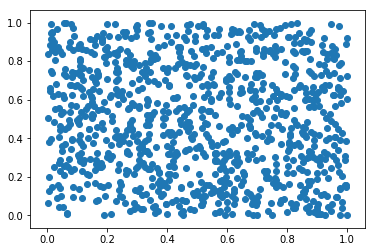

In [17]:
# numpy.random.rand(d0, d1, ..., dn)：生成一个[0,1)之间的随机浮点数或N维浮点数组 —— 均匀分布

import matplotlib.pyplot as plt  # 导入matplotlib模块，用于图表辅助分析
%matplotlib inline 
# 魔法函数，每次运行自动生成图表

a = np.random.rand()
print(a,type(a))  # 生成一个随机浮点数

b = np.random.rand(4)
print(b,type(b))  # 生成形状为4的一维数组

c = np.random.rand(2,3)
print(c,type(c))  # 生成形状为2*3的二维数组，注意这里不是((2,3))

samples1 = np.random.rand(1000)
samples2 = np.random.rand(1000)
plt.scatter(samples1,samples2)
# 生成1000个均匀分布的样本值

#### D3 正态分布

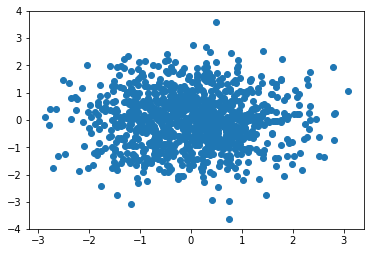

In [18]:
#  numpy.random.randn(d0, d1, ..., dn)：生成一个浮点数或N维浮点数组 —— 正态分布

samples1 = np.random.randn(1000)
samples2 = np.random.randn(1000)
plt.scatter(samples1,samples2)
# randn和rand的参数用法一样
# 生成1000个正太的样本值

#### D4范围随机数

In [19]:
# numpy.random.randint(low, high=None, size=None, dtype='l')：生成一个整数或N维整数数组
# 若high不为None时，取[low,high)之间随机整数，否则取值[0,low)之间随机整数，且high必须大于low 
# dtype参数：只能是int类型  

print(np.random.randint(2))
# low=2：生成1个[0,2)之间随机整数  

print(np.random.randint(2,size=5))
# low=2,size=5 ：生成5个[0,2)之间随机整数

print(np.random.randint(2,6,size=5))
# low=2,high=6,size=5：生成5个[2,6)之间随机整数  

print(np.random.randint(2,size=(2,3)))
# low=2,size=(2,3)：生成一个2x3整数数组,取数范围：[0,2)随机整数 

print(np.random.randint(2,6,(2,3)))
# low=2,high=6,size=(2,3)：生成一个2*3整数数组,取值范围：[2,6)随机整数  

1
[1 1 0 0 1]
[2 4 2 3 5]
[[0 1 1]
 [0 0 0]]
[[3 2 3]
 [3 3 3]]


## 二、Pandas
基于Numpy构建，为数据分析而存在！
- 一维数组 Series + 二维数组Dataframe
- 可直接读取数据并做处理
- 兼容各种数据库
- 支持各种分析算法

### A Series
series 数据结构，是带标签的一维数组，可以保存任何数据类型（整数，字符串，浮点数，python对象等），轴标签统称为索引。

In [20]:
import numpy as np
import pandas as pd

In [21]:
ar = np.random.rand(5)
s=pd.Series(ar)
print(ar)
print(s)
print(type(s))
# 查看数据、数据类型

print('-----')
# 必须进行list转换 否则是输出性质
print(list(s.index))
print(s.values)
# .index查看series索引，类型为rangeindex
# .values查看series值，类型是ndarray

# 核心：series相比于ndarray，是一个自带索引index的数组 → 一维数组 + 对应索引
# 所以当只看series的值的时候，就是一个ndarray
# series和ndarray较相似，索引切片功能差别不大
# series和dict相比，series更像一个有顺序的字典（dict本身不存在顺序），其索引原理与字典相似（一个用key，一个用index）

[0.53999069 0.6617523  0.10224644 0.05204251 0.3310513 ]
0    0.539991
1    0.661752
2    0.102246
3    0.052043
4    0.331051
dtype: float64
<class 'pandas.core.series.Series'>
-----
[0, 1, 2, 3, 4]
[0.53999069 0.6617523  0.10224644 0.05204251 0.3310513 ]


#### A1 创建方式

In [22]:
# Series 创建方法一：由字典创建，字典的key就是index，values就是values
dic={'a':1,'b':2,'c':3,'4':4,'5':5}
s=pd.Series(dic)
print(s)

a    1
b    2
c    3
4    4
5    5
dtype: int64


In [23]:
# Series 创建方法二：由数组创建(一维数组)
arr = np.random.randn(5)
s=pd.Series(arr)
print(arr)
print(s)
# 默认index是从0开始，步长为1的数字

s=pd.Series(arr,index=['a','b','c','d','e'],dtype=np.object)
print(s)
# index参数：设置index，长度保持一致
# dtype参数：设置数值类型

[ 2.3193078  -1.34518271 -1.01260864  0.39610633 -1.39943143]
0    2.319308
1   -1.345183
2   -1.012609
3    0.396106
4   -1.399431
dtype: float64
a     2.31931
b    -1.34518
c    -1.01261
d    0.396106
e    -1.39943
dtype: object


In [24]:
# Series 创建方法三：由标量创建
s=pd.Series(10,index=range(10))
print(s)

0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
8    10
9    10
dtype: int64


#### A2 Series.name

In [25]:
# Series 名称属性：name

s1 = pd.Series(np.random.randn(5))
print(s1)
print('-----')
s2 = pd.Series(np.random.randn(5),name = 'test')
print(s2)
print(s1.name, s2.name,type(s2.name))
print("-----")
# name为Series的一个参数，创建一个数组的 名称
# .name方法：输出数组的名称，输出格式为str，如果没用定义输出名称，输出为None

s3 = s2.rename('hehehe')
print(s3)
print(s3.name, s2.name)
# .rename()重命名一个数组的名称，并且新指向一个数组，原数组不变

0    0.316681
1   -0.996334
2   -0.847182
3   -0.005757
4    1.118534
dtype: float64
-----
0    0.488529
1   -1.714536
2    0.818536
3    0.178178
4   -0.874743
Name: test, dtype: float64
None test <class 'str'>
-----
0    0.488529
1   -1.714536
2    0.818536
3    0.178178
4   -0.874743
Name: hehehe, dtype: float64
hehehe test


#### A3 Series 索引

In [27]:
# 位置下表，类似序列
s= pd.Series(np.random.rand(5))
print(s)
print(s[0],type(s[0]),s[0].dtype)
print(float(s[0]),type(float(s[0])))
#print(s[-1])
# 位置下标从0开始
# 输出结果为numpy.float格式，
# 可以通过float()函数转换为python float格式
# numpy.float与float占用字节不同
# s[-1]结果如何？

0    0.689513
1    0.275984
2    0.383642
3    0.595344
4    0.036273
dtype: float64
0.689513285595528 <class 'numpy.float64'> float64
0.689513285595528 <class 'float'>


In [28]:
# 标签索引

s =pd.Series(np.random.rand(5),index=['a','b','c','d','e'])
print(s)
print(s['a'],type(s['a']),s['a'].dtype)
# 方法类似下标索引，用[]表示，内写上index，注意index是字符串

sci = s[['a','b','c','e']]
print(sci,type(sci))
# 如果需要选择多个标签的值，用[[]]来表示（相当于[]中包含一个列表） 该方法仅限索引
# 多标签索引结果是新的数组

a    0.817907
b    0.095307
c    0.216382
d    0.759434
e    0.126754
dtype: float64
0.8179069364660166 <class 'numpy.float64'> float64
a    0.817907
b    0.095307
c    0.216382
e    0.126754
dtype: float64 <class 'pandas.core.series.Series'>


In [31]:
# 切片索引 和列表一般无二
s1 = pd.Series(np.random.rand(5))
s2 = pd.Series(np.random.rand(5), index = ['a','b','c','d','e'])
print(s1[1:4],s1[4])
print(s2['a':'c'],s2['c'])
print(s2[0:3],s2[3])
print('-----')

print(s2[:-1])
print(s2[::2])
# 下标索引做切片，和list写法一样

1    0.654244
2    0.691166
3    0.694254
dtype: float64 0.6854238136413483
a    0.319589
b    0.336689
c    0.369989
dtype: float64 0.36998923744304857
a    0.319589
b    0.336689
c    0.369989
dtype: float64 0.8837974545854325
-----
a    0.319589
b    0.336689
c    0.369989
d    0.883797
dtype: float64
a    0.319589
c    0.369989
e    0.229047
dtype: float64


In [33]:
# 布尔型索引


s = pd.Series(np.random.rand(3)*100)
s[4] = None  # 添加一个空值
print(s)
bs1 = s > 50
bs2 = s.isnull()
bs3 = s.notnull()
print(bs1, type(bs1), bs1.dtype)
print(bs2, type(bs2), bs2.dtype)
print(bs3, type(bs3), bs3.dtype)
print('-----')
# 数组做判断之后，返回的是一个由布尔值组成的新的数组
# .isnull() / .notnull() 判断是否为空值 (None代表空值，NaN代表有问题的数值，两个都会识别为空值)

print(s[s > 25])
print(s[bs3])
# 布尔型索引方法：用[判断条件]表示，其中判断条件可以是 一个语句，或者是 一个布尔型数组！

0    60.5642
1    10.2207
2    32.5436
4       None
dtype: object
0     True
1    False
2    False
4    False
dtype: bool <class 'pandas.core.series.Series'> bool
0    False
1    False
2    False
4     True
dtype: bool <class 'pandas.core.series.Series'> bool
0     True
1     True
2     True
4    False
dtype: bool <class 'pandas.core.series.Series'> bool
-----
0    60.5642
2    32.5436
dtype: object
0    60.5642
1    10.2207
2    32.5436
dtype: object


#### A4 数据查看

In [35]:
s = pd.Series(np.random.rand(50))
print(s.head(10))
print(s.tail())
# .head()查看头部数据
# .tail()查看尾部数据
# 默认查看5条

0    0.728057
1    0.236103
2    0.190025
3    0.755962
4    0.395057
5    0.320868
6    0.961994
7    0.773651
8    0.671449
9    0.187171
dtype: float64
45    0.157706
46    0.920683
47    0.631203
48    0.006868
49    0.912650
dtype: float64


#### A5 重新索引 填充缺失值

In [36]:
# 重新索引reindex
# .reindex将会根据索引重新排序，如果当前索引不存在，则引入缺失值

s = pd.Series(np.random.rand(3), index = ['a','b','c'])
print(s)
s1 = s.reindex(['c','b','a','d'])
print(s1)
# .reindex()中也是写列表
# 这里'd'索引不存在，所以值为NaN

s2 = s.reindex(['c','b','a','d'], fill_value = 0)
print(s2)
# fill_value参数：填充缺失值的值

a    0.994640
b    0.120836
c    0.680773
dtype: float64
c    0.680773
b    0.120836
a    0.994640
d         NaN
dtype: float64
c    0.680773
b    0.120836
a    0.994640
d    0.000000
dtype: float64


#### A6 对齐求和

In [38]:
# Series对齐

s1 = pd.Series(np.random.rand(3), index = ['Jack','Marry','Tom'])
s2 = pd.Series(np.random.rand(3), index = ['Wang','Jack','Marry'])
print(s1)
print(s2)
print(s1+s2)
# Series 和 ndarray 之间的主要区别是，Series 上的操作会根据标签自动对齐
# index顺序不会影响数值计算，以标签来计算
# 空值和任何值计算结果扔为空值

Jack     0.566030
Marry    0.092725
Tom      0.361859
dtype: float64
Wang     0.565847
Jack     0.656344
Marry    0.269804
dtype: float64
Jack     1.222374
Marry    0.362529
Tom           NaN
Wang          NaN
dtype: float64


#### A7 删除

In [39]:
s = pd.Series(np.random.rand(5), index = list('ngjur'))
print(s)
s1 = s.drop('n')
s2 = s.drop(['g','j'])
print(s1)
print(s2)
print(s)
# drop 删除元素之后返回副本(inplace=False)

n    0.724020
g    0.143029
j    0.086049
u    0.882715
r    0.335485
dtype: float64
g    0.143029
j    0.086049
u    0.882715
r    0.335485
dtype: float64
n    0.724020
u    0.882715
r    0.335485
dtype: float64
n    0.724020
g    0.143029
j    0.086049
u    0.882715
r    0.335485
dtype: float64


#### A8 添加
- 直接赋值
- append函数

In [40]:
s1 = pd.Series(np.random.rand(5))
s2 = pd.Series(np.random.rand(5), index = list('ngjur'))
print(s1)
print(s2)
s1[5] = 100
s2['a'] = 100
print(s1)
print(s2)
print('-----')
# 直接通过下标索引/标签index添加值

s3 = s1.append(s2)
print(s3)
print(s1)
# 通过.append方法，直接添加一个数组
# .append方法生成一个新的数组，不改变之前的数组

0    0.528640
1    0.239862
2    0.485727
3    0.271686
4    0.537451
dtype: float64
n    0.252660
g    0.803816
j    0.264230
u    0.707983
r    0.080203
dtype: float64
0      0.528640
1      0.239862
2      0.485727
3      0.271686
4      0.537451
5    100.000000
dtype: float64
n      0.252660
g      0.803816
j      0.264230
u      0.707983
r      0.080203
a    100.000000
dtype: float64
-----
0      0.528640
1      0.239862
2      0.485727
3      0.271686
4      0.537451
5    100.000000
n      0.252660
g      0.803816
j      0.264230
u      0.707983
r      0.080203
a    100.000000
dtype: float64
0      0.528640
1      0.239862
2      0.485727
3      0.271686
4      0.537451
5    100.000000
dtype: float64


#### A9 修改

In [41]:
# 修改

s = pd.Series(np.random.rand(3), index = ['a','b','c'])
print(s)
s['a'] = 100
s[['b','c']] = 200
print(s)
# 通过索引直接修改，类似序列

a    0.221937
b    0.257527
c    0.506514
dtype: float64
a    100.0
b    200.0
c    200.0
dtype: float64


### B Dataframe
"二维数组"Dataframe：是一个表格型的数据结构，包含一组有序的列，其列的值类型可以是数值、字符串、布尔值等。

Dataframe中的数据以一个或多个二维块存放，不是列表、字典或一维数组结构。
#### B0 获取行和列

In [106]:
import pandas as pd
df1={
    0:[1,4,7],
    1:[2,5,8],
    2:[3,6,9]
}
df1=pd.DataFrame(df1)
print(df1)
# 列名称
print(df1.columns.values.tolist() )
# 行名称
print(df1._stat_axis.values.tolist())
for column in df1:
    print(column)

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9
[0, 1, 2]
[0, 1, 2]
0
1
2


In [42]:
# Dataframe 数据结构
# Dataframe是一个表格型的数据结构，“带有标签的二维数组”。
# Dataframe带有index（行标签）和columns（列标签）

data = {'name':['Jack','Tom','Mary'],
        'age':[18,19,20],
       'gender':['m','m','w']}
frame = pd.DataFrame(data)
print(frame)  
print(type(frame))
print(frame.index,'\n该数据类型为：',type(frame.index))
print(frame.columns,'\n该数据类型为：',type(frame.columns))
print(frame.values,'\n该数据类型为：',type(frame.values))
# 查看数据，数据类型为dataframe
# .index查看行标签
# .columns查看列标签
# .values查看值，数据类型为ndarray

   name  age gender
0  Jack   18      m
1   Tom   19      m
2  Mary   20      w
<class 'pandas.core.frame.DataFrame'>
RangeIndex(start=0, stop=3, step=1) 
该数据类型为： <class 'pandas.core.indexes.range.RangeIndex'>
Index(['name', 'age', 'gender'], dtype='object') 
该数据类型为： <class 'pandas.core.indexes.base.Index'>
[['Jack' 18 'm']
 ['Tom' 19 'm']
 ['Mary' 20 'w']] 
该数据类型为： <class 'numpy.ndarray'>


#### B1 创建方法

In [49]:
# 由数组/list 组成的字典
# pandas.Dataframe()

data1={
    'a':[1,2,3],
    'b':[3,4,5],
    'c':[5,6,7]
}
data2={'one':np.random.rand(3),
      'two':np.random.rand(3)}
print(data1)
print(data2)
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
print(df1)
print(df2)
# 由数组/list组成的字典 创建Dataframe，columns为字典key，index为默认数字标签
# 字典的值的长度必须保持一致！

df1=pd.DataFrame(data1,columns=['b','c','a','d'])
print(df1)
df1 = pd.DataFrame(data1, columns = ['b','c'])
print(df1)
# columns参数：可以重新指定列的顺序，格式为list，如果现有数据中没有该列（比如'd'），则产生NaN值
# 如果columns重新指定时候，列的数量可以少于原数据

df2 = pd.DataFrame(data2, index = ['f1','f2','f3'])  # 这里如果尝试  index = ['f1','f2','f3','f4'] 会怎么样？
print(df2)
# index参数：重新定义index，格式为list，长度必须保持一致

{'a': [1, 2, 3], 'b': [3, 4, 5], 'c': [5, 6, 7]}
{'one': array([0.6683601 , 0.18680459, 0.81309173]), 'two': array([0.54290932, 0.18135603, 0.24971029])}
   a  b  c
0  1  3  5
1  2  4  6
2  3  5  7
        one       two
0  0.668360  0.542909
1  0.186805  0.181356
2  0.813092  0.249710
   b  c  a    d
0  3  5  1  NaN
1  4  6  2  NaN
2  5  7  3  NaN
   b  c
0  3  5
1  4  6
2  5  7
         one       two
f1  0.668360  0.542909
f2  0.186805  0.181356
f3  0.813092  0.249710


In [50]:
# Dataframe 创建方法二：由Series组成的字典

data1 = {'one':pd.Series(np.random.rand(2)),
        'two':pd.Series(np.random.rand(3))}  # 没有设置index的Series
data2 = {'one':pd.Series(np.random.rand(2), index = ['a','b']),
        'two':pd.Series(np.random.rand(3),index = ['a','b','c'])}  # 设置了index的Series
print(data1)
print(data2)
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
print(df1)
print(df2)
# 由Seris组成的字典 创建Dataframe，columns为字典key，index为Series的标签（如果Series没有指定标签，则是默认数字标签）
# Series可以长度不一样，生成的Dataframe会出现NaN值


{'one': 0    0.270908
1    0.398403
dtype: float64, 'two': 0    0.594958
1    0.936008
2    0.912597
dtype: float64}
{'one': a    0.829711
b    0.852179
dtype: float64, 'two': a    0.921363
b    0.987983
c    0.669610
dtype: float64}
        one       two
0  0.270908  0.594958
1  0.398403  0.936008
2       NaN  0.912597
        one       two
a  0.829711  0.921363
b  0.852179  0.987983
c       NaN  0.669610


In [51]:
# Dataframe 创建方法三：通过二维数组直接创建

ar = np.random.rand(9).reshape(3,3)
print(ar)
df1 = pd.DataFrame(ar)
df2 = pd.DataFrame(ar, index = ['a', 'b', 'c'], columns = ['one','two','three'])  # 可以尝试一下index或columns长度不等于已有数组的情况
print(df1)
print(df2)
# 通过二维数组直接创建Dataframe，得到一样形状的结果数据，如果不指定index和columns，两者均返回默认数字格式
# index和colunms指定长度与原数组保持一致


[[0.2563869  0.43009903 0.93595657]
 [0.38088563 0.9247381  0.85144682]
 [0.82391375 0.97519815 0.7707439 ]]
          0         1         2
0  0.256387  0.430099  0.935957
1  0.380886  0.924738  0.851447
2  0.823914  0.975198  0.770744
        one       two     three
a  0.256387  0.430099  0.935957
b  0.380886  0.924738  0.851447
c  0.823914  0.975198  0.770744


In [52]:
# Dataframe 创建方法四：由字典组成的列表

data = [{'one': 1, 'two': 2}, {'one': 5, 'two': 10, 'three': 20}]
print(data)
df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data, index = ['a','b'])
df3 = pd.DataFrame(data, columns = ['one','two'])
print(df1)
print(df2)
print(df3)
# 由字典组成的列表创建Dataframe，columns为字典的key，index不做指定则为默认数组标签
# colunms和index参数分别重新指定相应列及行标签


[{'one': 1, 'two': 2}, {'one': 5, 'two': 10, 'three': 20}]
   one  three  two
0    1    NaN    2
1    5   20.0   10
   one  three  two
a    1    NaN    2
b    5   20.0   10
   one  two
0    1    2
1    5   10


In [54]:
# Dataframe 创建方法五：由字典组成的字典

data = {'Jack':{'math':90,'english':89,'art':78},
       'Marry':{'math':82,'english':95,'art':92},
       'Tom':{'math':78,'english':67}}
df1 = pd.DataFrame(data)
print(df1)
# 由字典组成的字典创建Dataframe，columns为字典的key，index为子字典的key

df2 = pd.DataFrame(data, columns = ['Jack','Tom','Bob'])
# df3 = pd.DataFrame(data, index = ['a','b','c'])
print(df2)
# print(df3)
# columns参数可以增加和减少现有列，如出现新的列，值为NaN
# index在这里和之前不同，并不能改变原有index，如果指向新的标签，值为NaN （非常重要！）

         Jack  Marry   Tom
art        78     92   NaN
english    89     95  67.0
math       90     82  78.0
         Jack   Tom  Bob
art        78   NaN  NaN
english    89  67.0  NaN
math       90  78.0  NaN


### C DataFrame 索引
- 行与列索引
- loc
- iloc


#### C1 选择行与列

In [56]:
# df[] - 选择列
# 一般用于选择列，也可以选择行

df = pd.DataFrame(np.random.rand(12).reshape(3,4)*100,
                   index = ['one','two','three'],
                   columns = ['a','b','c','d'])
print(df)
print('-----')

data1 = df['a']
data2 = df[['b','c']]  # 尝试输入 data2 = df[['b','c','e']]
print(data1)
print(data2)
# df[]默认选择列，[]中写列名（所以一般数据colunms都会单独制定，不会用默认数字列名，以免和index冲突）
# 单选列为Series，print结果为Series格式
# 多选列为Dataframe，print结果为Dataframe格式

data3 = df[:1]
#data3 = df[0]
#data3 = df['one']
print(data3,type(data3))
# df[]中为数字时，默认选择行，且只能进行切片的选择，不能单独选择（df[0]）
# 输出结果为Dataframe，即便只选择一行
# df[]不能通过索引标签名来选择行(df['one'])

# 核心笔记：df[col]一般用于选择列，[]中写列名

               a          b          c          d
one    71.919970  62.217107  47.378280  88.639823
two    16.943170  77.119523  47.878305  75.792809
three  65.559817  68.232179  49.546878  53.275859
-----
one      71.919970
two      16.943170
three    65.559817
Name: a, dtype: float64
               b          c
one    62.217107  47.378280
two    77.119523  47.878305
three  68.232179  49.546878
            a          b         c          d
one  71.91997  62.217107  47.37828  88.639823 <class 'pandas.core.frame.DataFrame'>


#### C2 loc

In [57]:
# df.loc[] - 按index选择行

df1 = pd.DataFrame(np.random.rand(16).reshape(4,4)*100,
                   index = ['one','two','three','four'],
                   columns = ['a','b','c','d'])
df2 = pd.DataFrame(np.random.rand(16).reshape(4,4)*100,
                   columns = ['a','b','c','d'])
print(df1)
print(df2)
print('-----')

data1 = df1.loc['one']
data2 = df2.loc[1]
print(data1)
print(data2)
print('单标签索引\n-----')
# 单个标签索引，返回Series

data3 = df1.loc[['two','three','five']]
data4 = df2.loc[[3,2,1]]
print(data3)
print(data4)
print('多标签索引\n-----')
# 多个标签索引，如果标签不存在，则返回NaN
# 顺序可变

data5 = df1.loc['one':'three']
data6 = df2.loc[1:3]
print(data5)
print(data6)
print('切片索引')
# 可以做切片对象
# 末端包含

# 核心笔记：df.loc[label]主要针对index选择行，同时支持指定index，及默认数字index

               a          b          c          d
one    12.578228  15.927974  46.153299  18.960977
two    73.765797  46.726634  51.179970  65.622034
three  97.344552  23.401740   7.752139  91.421090
four   10.322416  76.699269   0.175713  72.453230
           a          b          c          d
0  46.896779  31.120220  50.358591  10.397991
1  70.650341  21.065066  92.442650  35.426267
2  22.304741  42.276846  93.196625  68.020984
3  76.519809  20.214125  84.060198   5.233646
-----
a    12.578228
b    15.927974
c    46.153299
d    18.960977
Name: one, dtype: float64
a    70.650341
b    21.065066
c    92.442650
d    35.426267
Name: 1, dtype: float64
单标签索引
-----
               a          b          c          d
two    73.765797  46.726634  51.179970  65.622034
three  97.344552  23.401740   7.752139  91.421090
five         NaN        NaN        NaN        NaN
           a          b          c          d
3  76.519809  20.214125  84.060198   5.233646
2  22.304741  42.276846  93.196625  68.0

D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


#### C3 iloc

In [60]:
# df.iloc[] - 按照整数位置（从轴的0到length-1）选择行
# 类似list的索引，其顺序就是dataframe的整数位置，从0开始计

df = pd.DataFrame(np.random.rand(16).reshape(4,4)*100,
                   index = ['one','two','three','four'],
                   columns = ['a','b','c','d'])
print(df)
print('------')

print(df.iloc[0])
print(df.iloc[-1])
# print(df.iloc[4])
print('单位置索引\n-----')
# 单位置索引
# 和loc索引不同，不能索引超出数据行数的整数位置

print(df.iloc[[0,2]])
print(df.iloc[[3,2,1]])
print('多位置索引\n-----')
# 多位置索引
# 顺序可变

print(df.iloc[1:3])
print(df.iloc[::2])
print('切片索引')
# 切片索引
# 末端不包含

               a          b          c          d
one    75.240623   0.275602  85.697478  45.258503
two    75.515076  36.720582  35.599887  63.738082
three   1.183911  28.970501  75.720197  24.182028
four   40.504530  64.904410  15.439496  48.404067
------
a    75.240623
b     0.275602
c    85.697478
d    45.258503
Name: one, dtype: float64
a    40.504530
b    64.904410
c    15.439496
d    48.404067
Name: four, dtype: float64
单位置索引
-----
               a          b          c          d
one    75.240623   0.275602  85.697478  45.258503
three   1.183911  28.970501  75.720197  24.182028
               a          b          c          d
four   40.504530  64.904410  15.439496  48.404067
three   1.183911  28.970501  75.720197  24.182028
two    75.515076  36.720582  35.599887  63.738082
多位置索引
-----
               a          b          c          d
two    75.515076  36.720582  35.599887  63.738082
three   1.183911  28.970501  75.720197  24.182028
               a          b          c        

#### C4 布尔型索引

In [61]:
# 布尔型索引
# 和Series原理相同

df = pd.DataFrame(np.random.rand(16).reshape(4,4)*100,
                   index = ['one','two','three','four'],
                   columns = ['a','b','c','d'])
print(df)
print('------')

b1 = df < 20
print(b1,type(b1))
print(df[b1])  # 也可以书写为 df[df < 20]
print('------')
# 不做索引则会对数据每个值进行判断
# 索引结果保留 所有数据：True返回原数据，False返回值为NaN

b2 = df['a'] > 50
print(b2,type(b2))
print(df[b2])  # 也可以书写为 df[df['a'] > 50]
print('------')
# 单列做判断
# 索引结果保留 单列判断为True的行数据，包括其他列

b3 = df[['a','b']] > 50
print(b3,type(b3))
print(df[b3])  # 也可以书写为 df[df[['a','b']] > 50]
print('------')
# 多列做判断
# 索引结果保留 所有数据：True返回原数据，False返回值为NaN

b4 = df.loc[['one','three']] < 50
print(b4,type(b4))
print(df[b4])  # 也可以书写为 df[df.loc[['one','three']] < 50]
print('------')
# 多行做判断
# 索引结果保留 所有数据：True返回原数据，False返回值为NaN



               a          b          c          d
one    64.951837  71.505531  85.337732  58.189077
two    20.628373  47.629378  85.551626  74.307264
three  97.470636  95.272327  73.748991  99.670166
four   49.276768  13.594228   3.235989  39.522290
------
           a      b      c      d
one    False  False  False  False
two    False  False  False  False
three  False  False  False  False
four   False   True   True  False <class 'pandas.core.frame.DataFrame'>
        a          b         c   d
one   NaN        NaN       NaN NaN
two   NaN        NaN       NaN NaN
three NaN        NaN       NaN NaN
four  NaN  13.594228  3.235989 NaN
------
one       True
two      False
three     True
four     False
Name: a, dtype: bool <class 'pandas.core.series.Series'>
               a          b          c          d
one    64.951837  71.505531  85.337732  58.189077
three  97.470636  95.272327  73.748991  99.670166
------
           a      b
one     True   True
two    False  False
three   True   True

#### C5 多重索引

In [62]:
# 多重索引：比如同时索引行和列
# 先选择列再选择行 —— 相当于对于一个数据，先筛选字段，再选择数据量

df = pd.DataFrame(np.random.rand(16).reshape(4,4)*100,
                   index = ['one','two','three','four'],
                   columns = ['a','b','c','d'])
print(df)
print('------')

print(df['a'].loc[['one','three']])   # 选择a列的one，three行
print(df[['b','c','d']].iloc[::2])   # 选择b，c，d列的one，three行
print(df[df['a'] < 50].iloc[:2])   # 选择满足判断索引的前两行数据

               a          b          c          d
one    73.524631  92.877608  81.130864   0.550561
two    95.796960  54.994659  11.285518  13.957744
three  75.014838  82.459152  57.123120  98.187763
four   25.824818  44.405262  25.593998  51.259008
------
one      73.524631
three    75.014838
Name: a, dtype: float64
               b          c          d
one    92.877608  81.130864   0.550561
three  82.459152  57.123120  98.187763
              a          b          c          d
four  25.824818  44.405262  25.593998  51.259008


#### C6 Loc与iLoc的区别
- loc:通过索引index 中的具体值来取行数据
- iloc：通过行号来取数据

In [64]:
#创建一个Dataframe
data=pd.DataFrame(np.arange(16).reshape(4,4),index=list('abcd'),columns=list('ABCD'))
data

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [65]:
# loc 取索引为‘a’的行
data.loc['a']

A    0
B    1
C    2
D    3
Name: a, dtype: int32

In [66]:
# iloc 取同样的a行数据如何取？ 直接取index为a的行的数据位置 即第0行
data.iloc[0]

A    0
B    1
C    2
D    3
Name: a, dtype: int32

In [67]:
# loc 提取列数据A列的所有行 多取几列格式为data.loc[:,['A','B']]
data.loc[:,['A']]

,A
a,0
b,4
c,8
d,12


In [69]:
# iloc 提取列数据A列的所有行 多取几列格式为data.loc[:,[0,1]]
data.iloc[:,[0,1]]

,A,B
a,0,1
b,4,5
c,8,9
d,12,13


In [70]:
# loc 提取index为 a,b 列名为 A,B中的数据
data.loc[['a','b'],['A','B']]

,A,B
a,0,1
b,4,5


In [72]:
# iloc 提取index为 a,b 列名为 A,B中的数据
data.iloc[[0,1],[0,1]]

,A,B
a,0,1
b,4,5


In [73]:
# 取所有行和列数据loc和iloc都是一样的
data.loc[:,:]

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [74]:
data.iloc[:,:]

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


#### C7 根据某个数据来提取数据所在行

In [82]:
data.loc[data['A']==4]

,A,B,C,D
b,4,5,6,7


In [88]:
# 中间的连接词可以是 & | 但是注意用括号将两个判断隔开
# 这样子会返回多行
data.loc[(data['C']==6) | (data['A']==0)]

,A,B,C,D
a,0,1,2,3
b,4,5,6,7


In [90]:
data[data['A']==0]

,A,B,C,D
a,0,1,2,3


In [92]:
data[data['A'].isin([0])] # isin函数 注意参数里可以使用列表 

,A,B,C,D
a,0,1,2,3


### D 数据查看 转置

In [93]:
# 数据查看、转置

df = pd.DataFrame(np.random.rand(16).reshape(8,2)*100,
                   columns = ['a','b'])
print(df.head(2))
print(df.tail())
# .head()查看头部数据
# .tail()查看尾部数据
# 默认查看5条

print(df.T)
# .T 转置

           a          b
0  73.286048  36.310224
1   4.882986  70.970365
           a          b
3  47.570630  54.693348
4  95.022487  34.478844
5  29.682503  21.664997
6  92.609379  59.585621
7   5.386847  83.893604
           0          1          2          3          4          5  \
a  73.286048   4.882986   6.186699  47.570630  95.022487  29.682503   
b  36.310224  70.970365  12.526273  54.693348  34.478844  21.664997   

           6          7  
a  92.609379   5.386847  
b  59.585621  83.893604  


### E 添加与修改

In [94]:
df = pd.DataFrame(np.random.rand(16).reshape(4,4)*100,
                   columns = ['a','b','c','d'])
print(df)

df['e'] = 10
df.loc[4] = 20
print(df)
# 新增列/行并赋值

df['e'] = 20
df[['a','c']] = 100
print(df)
# 索引后直接修改值

           a          b          c          d
0  80.879094   3.074666  79.561386  16.945964
1   6.365760  42.035288  17.501286  41.214642
2  92.198220  31.721384   8.849510  16.964675
3  89.029956  22.497455  70.076288  92.031643
           a          b          c          d   e
0  80.879094   3.074666  79.561386  16.945964  10
1   6.365760  42.035288  17.501286  41.214642  10
2  92.198220  31.721384   8.849510  16.964675  10
3  89.029956  22.497455  70.076288  92.031643  10
4  20.000000  20.000000  20.000000  20.000000  20
     a          b    c          d   e
0  100   3.074666  100  16.945964  20
1  100  42.035288  100  41.214642  20
2  100  31.721384  100  16.964675  20
3  100  22.497455  100  92.031643  20
4  100  20.000000  100  20.000000  20


### F 删除

In [101]:
df = pd.DataFrame(np.random.rand(16).reshape(4,4)*100,
                   columns = ['a','b','c','d'])
print(df)

#del 删除列
del df['a']
print(df)
print('----')

# drop 删除行 inplace=False → 删除后生成新的数据，不改变原数据

print(df.drop(0)) # 删除第一行
print(df.drop([1,2])) # 删除2到3之间的这行
print(df)# 注意原先的数据并没有被修改

print('----')
print(df.drop(['d'],axis=1))
# 删除列，需要加上axis = 1，inplace=False → 删除后生成新的数据，不改变原数据
print(df)

           a          b          c          d
0  29.440366  83.167573   0.527882  34.285057
1  95.462638  59.932219  44.536374  24.879351
2  92.709999  72.174701  35.578621   0.056991
3  28.197265  64.035587  24.949657  44.995924
           b          c          d
0  83.167573   0.527882  34.285057
1  59.932219  44.536374  24.879351
2  72.174701  35.578621   0.056991
3  64.035587  24.949657  44.995924
----
           b          c          d
1  59.932219  44.536374  24.879351
2  72.174701  35.578621   0.056991
3  64.035587  24.949657  44.995924
           b          c          d
0  83.167573   0.527882  34.285057
3  64.035587  24.949657  44.995924
           b          c          d
0  83.167573   0.527882  34.285057
1  59.932219  44.536374  24.879351
2  72.174701  35.578621   0.056991
3  64.035587  24.949657  44.995924
----
           b          c
0  83.167573   0.527882
1  59.932219  44.536374
2  72.174701  35.578621
3  64.035587  24.949657
           b          c          d
0  83.1675

### G 对齐

In [102]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
print(df1 + df2)
# DataFrame对象之间的数据自动按照列和索引（行标签）对齐

          A         B         C   D
0  2.779841  1.677085 -0.964630 NaN
1  2.505320  1.266472 -1.156334 NaN
2  1.583522  0.221536  0.980136 NaN
3  2.689469  0.451266 -3.099638 NaN
4  0.714898  0.177798 -0.610903 NaN
5  1.582619  0.270678 -2.107396 NaN
6 -1.265560  0.837702 -1.136617 NaN
7       NaN       NaN       NaN NaN
8       NaN       NaN       NaN NaN
9       NaN       NaN       NaN NaN


### H 排序

In [103]:
# 排序1 - 按值排序 .sort_values
# 同样适用于Series

df1 = pd.DataFrame(np.random.rand(16).reshape(4,4)*100,
                   columns = ['a','b','c','d'])
print(df1)
print(df1.sort_values(['a'], ascending = True))  # 升序
print(df1.sort_values(['a'], ascending = False))  # 降序
print('------')
# ascending参数：设置升序降序，默认升序
# 单列排序

           a          b          c          d
0  52.557210  23.918357   0.886666  12.784250
1  10.445918  64.618728  38.800904  47.802324
2   0.807224  40.098876  99.405352  40.258336
3  38.078874  18.557554  30.682349  76.420501
           a          b          c          d
2   0.807224  40.098876  99.405352  40.258336
1  10.445918  64.618728  38.800904  47.802324
3  38.078874  18.557554  30.682349  76.420501
0  52.557210  23.918357   0.886666  12.784250
           a          b          c          d
0  52.557210  23.918357   0.886666  12.784250
3  38.078874  18.557554  30.682349  76.420501
1  10.445918  64.618728  38.800904  47.802324
2   0.807224  40.098876  99.405352  40.258336
------


In [104]:
df2 = pd.DataFrame({'a':[1,1,1,1,2,2,2,2],
                  'b':list(range(8)),
                  'c':list(range(8,0,-1))})
print(df2)
print(df2.sort_values(['a','c']))
# 多列排序，按列顺序排序

   a  b  c
0  1  0  8
1  1  1  7
2  1  2  6
3  1  3  5
4  2  4  4
5  2  5  3
6  2  6  2
7  2  7  1
   a  b  c
3  1  3  5
2  1  2  6
1  1  1  7
0  1  0  8
7  2  7  1
6  2  6  2
5  2  5  3
4  2  4  4


In [105]:
# 排序2 - 索引排序 .sort_index

df1 = pd.DataFrame(np.random.rand(16).reshape(4,4)*100,
                  index = [5,4,3,2],
                   columns = ['a','b','c','d'])
df2 = pd.DataFrame(np.random.rand(16).reshape(4,4)*100,
                  index = ['h','s','x','g'],
                   columns = ['a','b','c','d'])
print(df1)
print(df1.sort_index())
print(df2)
print(df2.sort_index())
# 按照index排序
# 默认 ascending=True, inplace=False

           a          b          c          d
5   4.880376  70.378637  65.055804   9.620505
4  81.513424  13.702549  58.381127  15.120076
3  76.370027  61.375451  41.852307  75.376353
2  63.171751  27.647483  36.053959  75.113852
           a          b          c          d
2  63.171751  27.647483  36.053959  75.113852
3  76.370027  61.375451  41.852307  75.376353
4  81.513424  13.702549  58.381127  15.120076
5   4.880376  70.378637  65.055804   9.620505
           a          b          c          d
h  26.547682  62.058417  56.780338  62.361846
s  43.694011  77.382166  46.484309  29.267648
x  86.936675  28.232998   8.277767  64.413251
g  86.635268  18.894375  21.151225  12.045476
           a          b          c          d
g  86.635268  18.894375  21.151225  12.045476
h  26.547682  62.058417  56.780338  62.361846
s  43.694011  77.382166  46.484309  29.267648
x  86.936675  28.232998   8.277767  64.413251
